# 類別

In [1]:
# 預處理
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras import models 
from keras import layers
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from keras.layers import Dense, Activation, Flatten
from matplotlib import pyplot as plt
import tensorflow as tf

dataset = pd.read_csv('Part1Data.csv')

In [2]:
# 設定答案
dataset_target = dataset.pop('IsoverAVE')
dataset = dataset.drop("Zone1PowerConsumption",axis = 1)
dataset = dataset.drop("Zone2PowerConsumption",axis = 1)
dataset = dataset.drop("Zone3PowerConsumption",axis = 1)
# 定義
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [3]:
# 分割資料
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( dataset , dataset_target , test_size = 0.2)
print(X_train.shape , X_test.shape)

(41932, 5) (10484, 5)


In [4]:
# 正規化
X_train = X_train.values.reshape(41932, 5)
X_test = X_test.values.reshape(10484, 5)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#正規化測試資料 (0到1之間)
X_train /= 255
X_test /= 255

#標籤向量化
Y_train = np.asarray(Y_train).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

In [5]:
#建構模型
network = models.Sequential()
network.add(layers.Dense(1000, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc',precision, recall])
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              6000      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 16,021
Trainable params: 16,021
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = network.fit(X_train,Y_train,
epochs=50,
batch_size=250,validation_data=(X_test, Y_test))

Epoch 1/50
168/168 [==============================] - 0s 2ms/step - loss: 0.6489 - acc: 0.6170 - precision: 0.6569 - recall: 0.4725 - val_loss: 0.6265 - val_acc: 0.6369 - val_precision: 0.6735 - val_recall: 0.5173
Epoch 2/50
168/168 [==============================] - 0s 1ms/step - loss: 0.6172 - acc: 0.6438 - precision: 0.6780 - recall: 0.5447 - val_loss: 0.6045 - val_acc: 0.6571 - val_precision: 0.6810 - val_recall: 0.5774
Epoch 3/50
168/168 [==============================] - 0s 1ms/step - loss: 0.6036 - acc: 0.6586 - precision: 0.6775 - recall: 0.6024 - val_loss: 0.6009 - val_acc: 0.6588 - val_precision: 0.7203 - val_recall: 0.5062
Epoch 4/50
168/168 [==============================] - 0s 1ms/step - loss: 0.5980 - acc: 0.6604 - precision: 0.6731 - recall: 0.6227 - val_loss: 0.5976 - val_acc: 0.6665 - val_precision: 0.6540 - val_recall: 0.6917
Epoch 5/50
168/168 [==============================] - 0s 2ms/step - loss: 0.5940 - acc: 0.6643 - precision: 0.6718 - recall: 0.6393 - val_loss: 

168/168 [==============================] - 0s 2ms/step - loss: 0.5687 - acc: 0.6772 - precision: 0.6898 - recall: 0.6440 - val_loss: 0.5662 - val_acc: 0.6826 - val_precision: 0.6979 - val_recall: 0.6304
Epoch 40/50
168/168 [==============================] - 0s 2ms/step - loss: 0.5678 - acc: 0.6780 - precision: 0.6934 - recall: 0.6381 - val_loss: 0.5697 - val_acc: 0.6812 - val_precision: 0.7174 - val_recall: 0.5866
Epoch 41/50
168/168 [==============================] - 0s 1ms/step - loss: 0.5672 - acc: 0.6792 - precision: 0.6955 - recall: 0.6377 - val_loss: 0.5638 - val_acc: 0.6808 - val_precision: 0.6754 - val_recall: 0.6809
Epoch 42/50
168/168 [==============================] - 0s 1ms/step - loss: 0.5660 - acc: 0.6802 - precision: 0.6979 - recall: 0.6377 - val_loss: 0.5748 - val_acc: 0.6845 - val_precision: 0.7480 - val_recall: 0.5447
Epoch 43/50
168/168 [==============================] - 0s 1ms/step - loss: 0.5656 - acc: 0.6794 - precision: 0.7005 - recall: 0.6288 - val_loss: 0.5637 

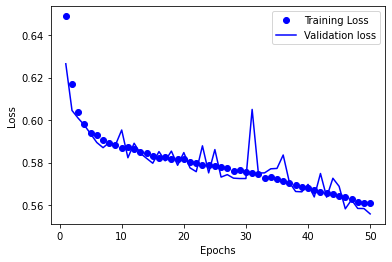

In [7]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label ="Training Loss")
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
preds = network.evaluate(x = X_test, y = Y_test)

F1 = 2 * (preds[2] * preds[3]) / (preds[2] + preds[3])
print('Precision', preds[2])
print('Recall', preds[3])
print('F1',F1)

328/328 [==============================] - 0s 457us/step - loss: 0.5558 - acc: 0.6948 - precision: 0.7298 - recall: 0.6079
Precision 0.7297828197479248
Recall 0.6079201102256775
F1 0.6633007109145211


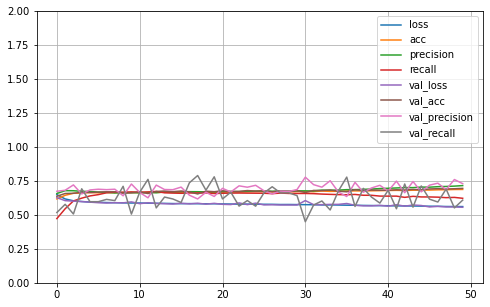

In [9]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

# 數值

In [10]:
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_absolute_percentage_error#MAPE
import tensorflow as tf
def MAE(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def MSE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean() 

def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [11]:
#匯入資料
dataset = pd.read_csv('Part1Data.csv')

In [12]:
# 正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_1 = scaler.fit_transform(dataset)
dataset_2 = pd.DataFrame(dataset_1,columns=dataset.columns)
dataset_2

# 設定答案
dataset_target = dataset_2.pop('Zone1PowerConsumption')
dataset_target.loc()[dataset_target == 0]= dataset_target.mean()
#丟棄不需用到的資料
dataset_2 = dataset_2.drop("Zone2PowerConsumption",axis = 1)
dataset_2 = dataset_2.drop("Zone3PowerConsumption",axis = 1)
dataset_2 = dataset_2.drop("general diffuse flows",axis = 1)
dataset_2 = dataset_2.drop("diffuse flows",axis = 1)
dataset_2 = dataset_2.drop("IsoverAVE",axis = 1)

In [13]:
X_test

array([[5.69019616e-02, 2.39647061e-01, 3.05882364e-04, 1.88235295e-04,
        5.68627438e-04],
       [7.83921555e-02, 2.08941177e-01, 1.93137266e-02, 3.99999990e-04,
        3.05882364e-04],
       [9.18039232e-02, 2.20745102e-01, 1.93372555e-02, 2.88235283e+00,
        1.87960789e-01],
       ...,
       [1.01333335e-01, 3.15294117e-01, 1.93294119e-02, 9.11372542e-01,
        7.41960764e-01],
       [6.91764653e-02, 1.96392164e-01, 1.93019602e-02, 1.94862747e+00,
        3.89019608e-01],
       [9.72549021e-02, 2.72627443e-01, 1.02352945e-03, 1.90666672e-02,
        1.54980384e-02]], dtype=float32)

In [14]:
# 分割資料
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( dataset_2 , dataset_target , test_size = 0.2)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)

(41932, 3)
(10484, 3)
(10484,)


In [16]:
#建立Sequential物件
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1))
network.compile(optimizer='RMSprop', loss='mse',metrics=[tf.keras.metrics.mae,tf.keras.metrics.mape,tf.metrics.mse] )
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = network.fit(X_train,Y_train,
epochs=50,
batch_size=50)

Epoch 1/50
839/839 [==============================] - 0s 513us/step - loss: 0.0286 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 36.6591 - mean_squared_error: 0.0286
Epoch 2/50
839/839 [==============================] - 0s 513us/step - loss: 0.0271 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 35.9403 - mean_squared_error: 0.0271
Epoch 3/50
839/839 [==============================] - 0s 507us/step - loss: 0.0270 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 36.0940 - mean_squared_error: 0.0270
Epoch 4/50
839/839 [==============================] - 0s 545us/step - loss: 0.0269 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 35.5980 - mean_squared_error: 0.0269
Epoch 5/50
839/839 [==============================] - 0s 562us/step - loss: 0.0268 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 35.8981 - mean_squared_error: 0.0268
Epoch 6/50
839/839 [==============================] - 0s 526us/step - loss: 0.02

839/839 [==============================] - 0s 526us/step - loss: 0.0257 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 34.6713 - mean_squared_error: 0.0257
Epoch 46/50
839/839 [==============================] - 0s 558us/step - loss: 0.0256 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 34.6982 - mean_squared_error: 0.0256
Epoch 47/50
839/839 [==============================] - 0s 520us/step - loss: 0.0256 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 34.8725 - mean_squared_error: 0.0256
Epoch 48/50
839/839 [==============================] - 0s 512us/step - loss: 0.0256 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 34.8010 - mean_squared_error: 0.0256
Epoch 49/50
839/839 [==============================] - 0s 512us/step - loss: 0.0256 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 34.9974 - mean_squared_error: 0.0256
Epoch 50/50
839/839 [==============================] - 0s 528us/step - loss: 0.0256 - m

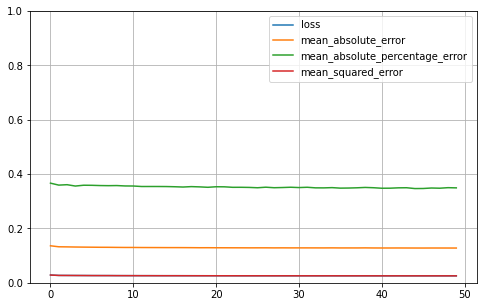

In [18]:
history.history['mean_absolute_percentage_error']=list(map(lambda x:x/100, history.history['mean_absolute_percentage_error']))
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
network.predict(X_test)

array([[0.52183425],
       [0.6037508 ],
       [0.29807222],
       ...,
       [0.37727624],
       [0.56986827],
       [0.47742337]], dtype=float32)

In [20]:
Y_test

17568    0.395467
36349    0.436959
5362     0.252239
29848    0.336275
9900     0.474154
           ...   
50688    0.328076
30504    0.956687
2340     0.270897
17641    0.458567
52201    0.452898
Name: Zone1PowerConsumption, Length: 10484, dtype: float64

Y_test.to_csv("AdultsDataSet_Finaltrain.csv",index=False)